In [1]:
!pip install numpy
!pip install pandas
!pip install seaborn

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel(r'C:/Users/Ravi Pandey/Documents/Internship/drive-download-20240709T093617Z-001/Agrocel_Jupyter.xlsx')

In [3]:
df

,Date,Sulphur Rate,Sulphuric acid Rate
0,2021-04-01,23.310000,NaN
1,2021-04-02,NaN,10.07
2,2021-04-03,22.960000,10.07
3,2021-04-04,NaN,10.07
4,2021-04-05,NaN,10.07
...,...,...,...
1152,2024-05-27,11.537000,NaN
1153,2024-05-28,12.063250,NaN
1154,2024-05-29,11.537000,NaN
1155,2024-05-30,12.005444,NaN


In [4]:
df.columns

Index([' Date', 'Sulphur Rate', 'Sulphuric acid Rate'], dtype='object')

In [5]:
df = df.rename(columns={' Date': 'Date'})

In [6]:
from sklearn.impute import KNNImputer

# Initialize the KNN imputer
k = 5  # Number of neighbors to consider
imputer = KNNImputer(n_neighbors=k)

df_subset = df[['Sulphur Rate']]
df_imputed = imputer.fit_transform(df_subset)
df['Sulphur Rate'] = df_imputed


In [7]:
df['Date'] = pd.to_datetime(df['Date'])

In [8]:
df

,Date,Sulphur Rate,Sulphuric acid Rate
0,2021-04-01,23.310000,NaN
1,2021-04-02,20.270638,10.07
2,2021-04-03,22.960000,10.07
3,2021-04-04,20.270638,10.07
4,2021-04-05,20.270638,10.07
...,...,...,...
1152,2024-05-27,11.537000,NaN
1153,2024-05-28,12.063250,NaN
1154,2024-05-29,11.537000,NaN
1155,2024-05-30,12.005444,NaN


In [9]:
print(df.dtypes)

Date                   datetime64[ns]
Sulphur Rate                  float64
Sulphuric acid Rate           float64
dtype: object


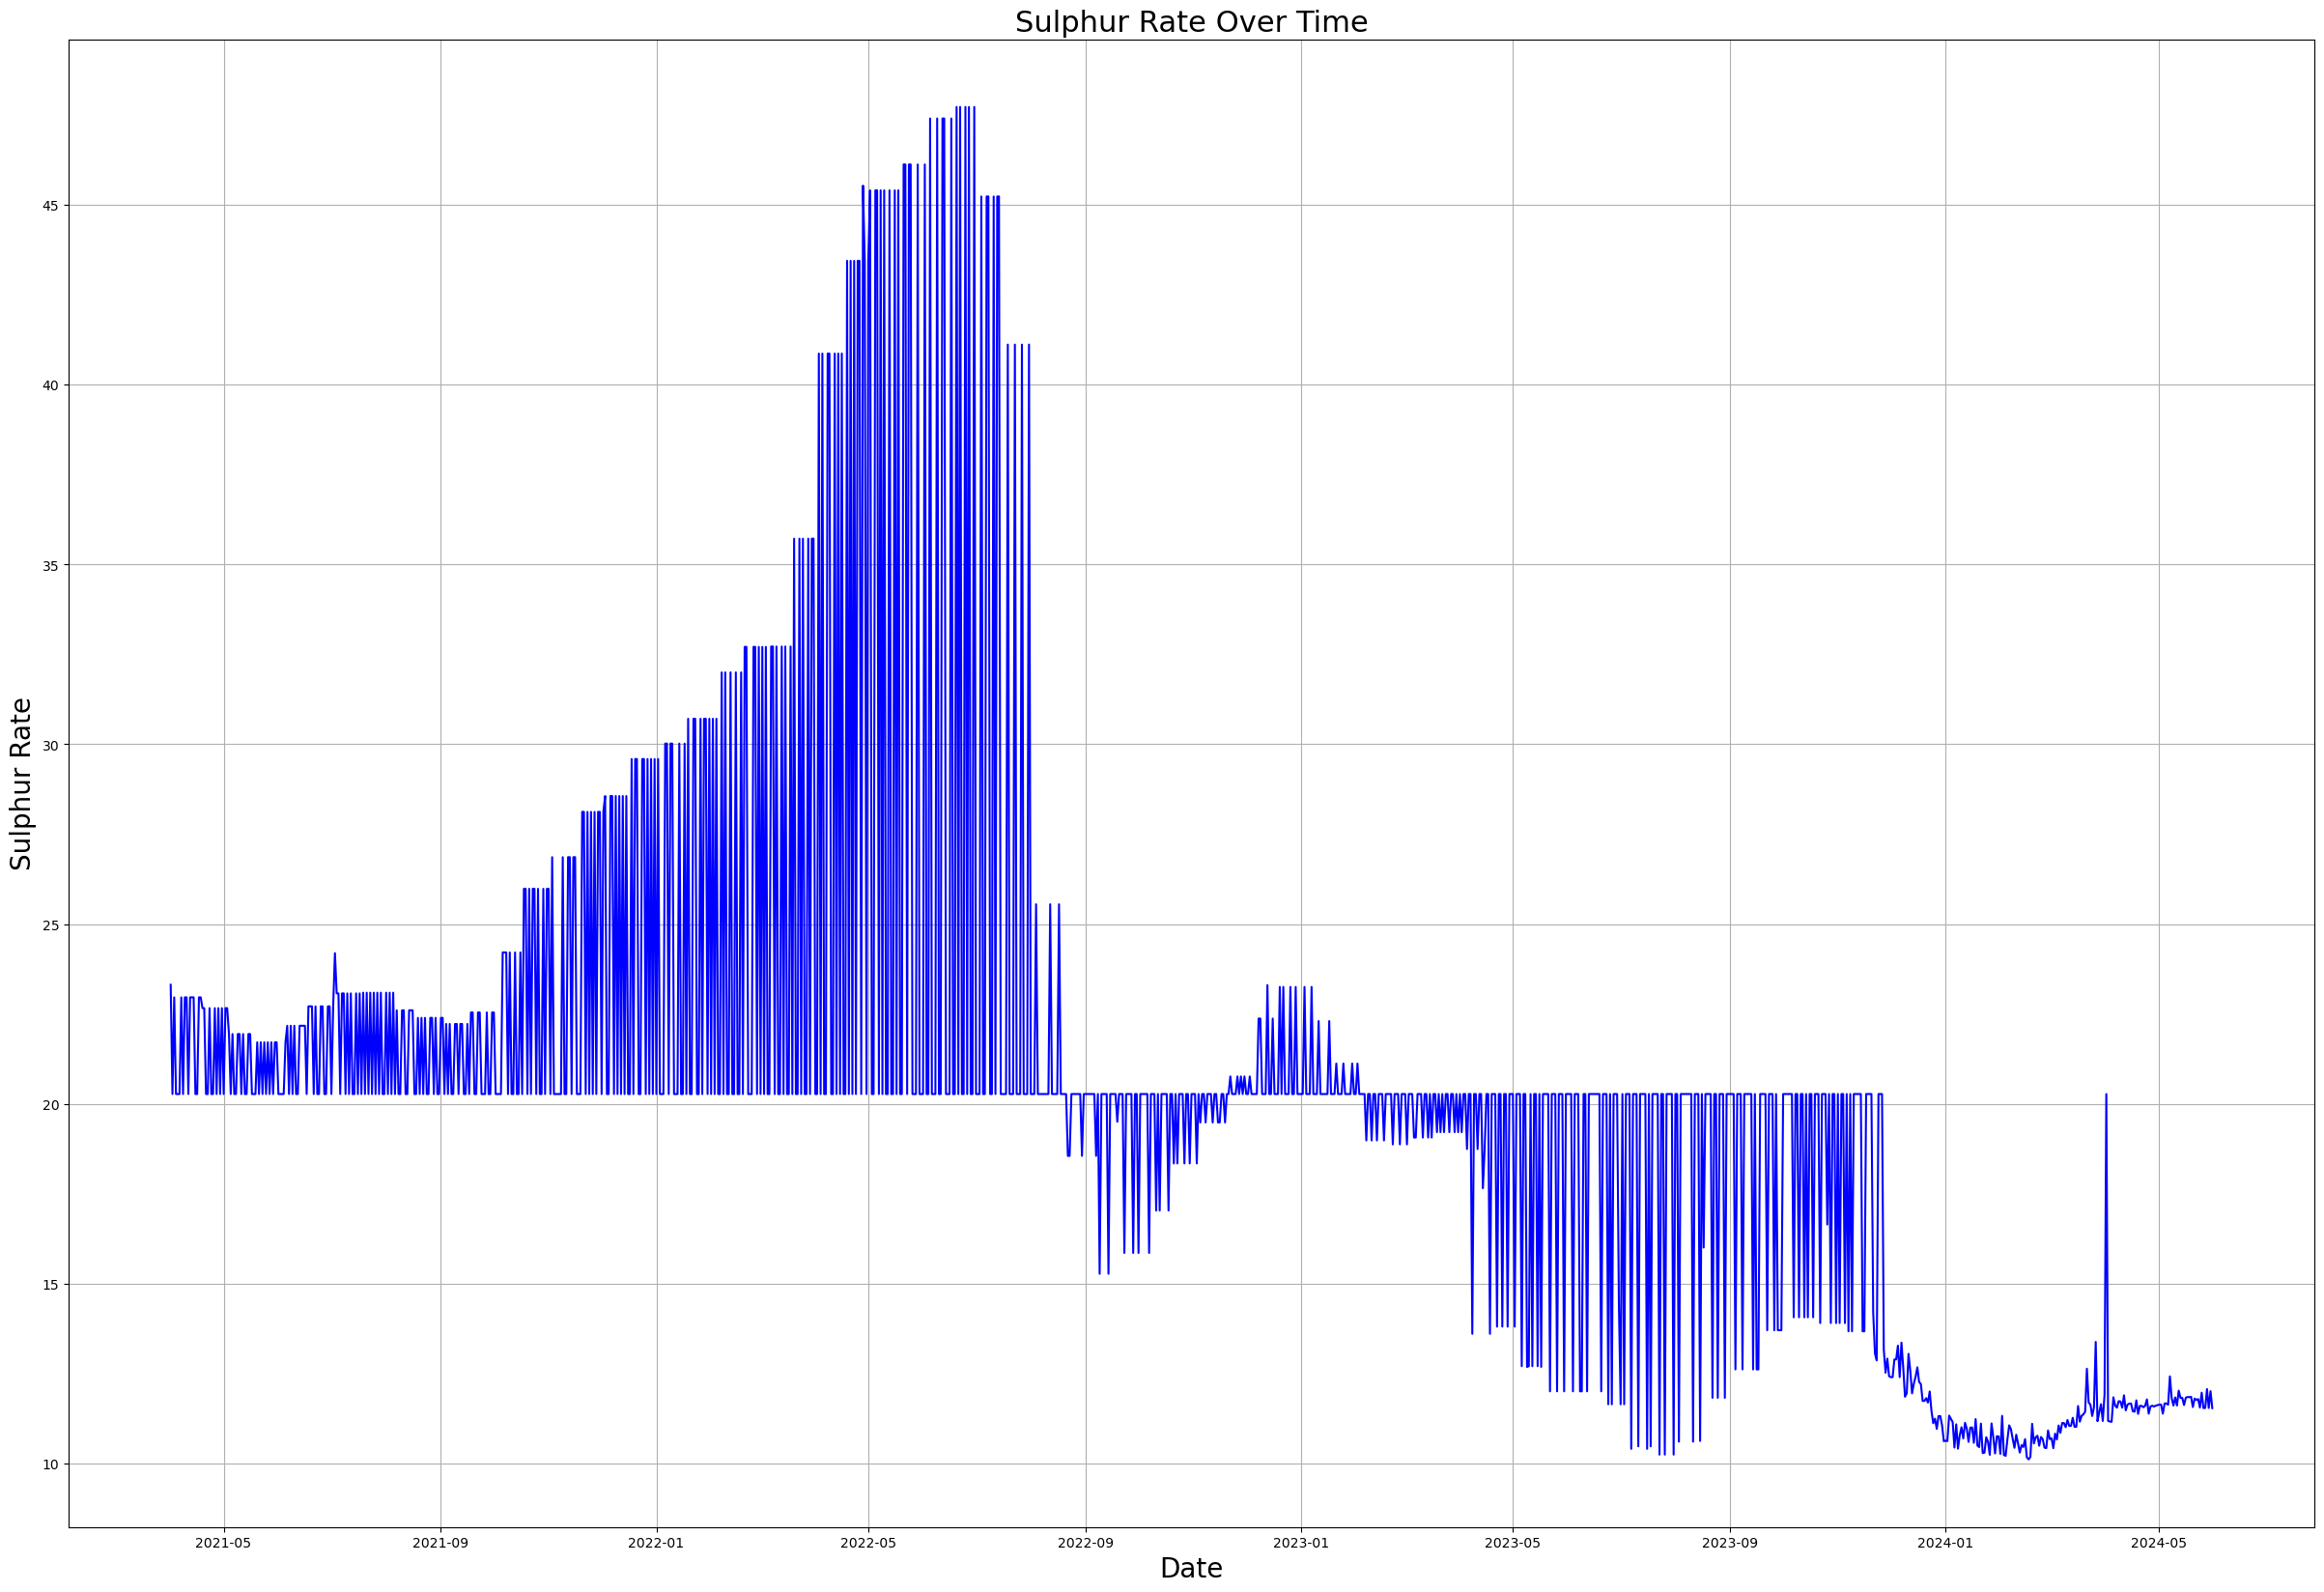

In [10]:
import matplotlib.pyplot as plt
import pandas as pd

# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Plot the time series
plt.figure(figsize=(30, 20))
plt.plot(df['Date'], df['Sulphur Rate'], linestyle='-', color='b')
plt.title('Sulphur Rate Over Time', fontsize=22)
plt.xlabel('Date', fontsize=20)
plt.ylabel('Sulphur Rate', fontsize=20)
plt.grid(True)
plt.show()

In [11]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(df['Sulphur Rate'],  
                            model ='multiplicative', period = 365) 


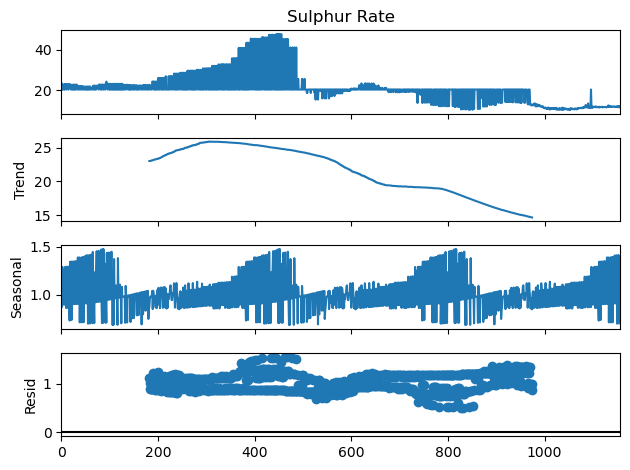

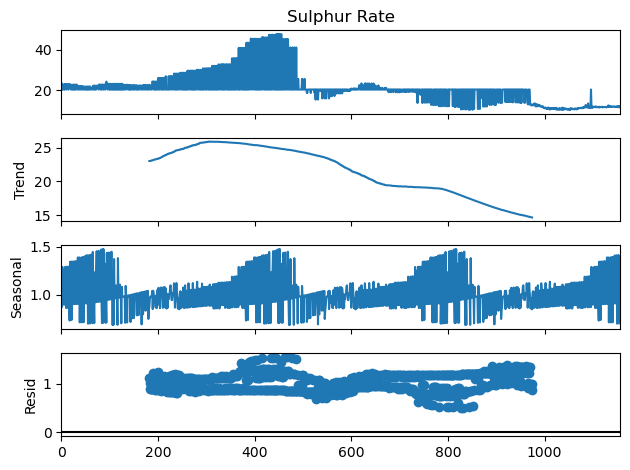

In [12]:
result.plot()

# ARIMA Model Preprocessing

In [13]:
#Train_test_split

spilt = (df.index < len(df)-30)
df_train = df[spilt].copy()
df_test = df[~spilt].copy()

In [14]:
#Stationarity checking 

from statsmodels.tsa.stattools import adfuller

# Select the column 'Sulphur Rate' from the DataFrame
sulphur_rate_data = df_train['Sulphur Rate']

# Perform the Augmented Dickey-Fuller test
adf_test = adfuller(sulphur_rate_data)
print(f'p-value: {adf_test[1]}')    #This gives us a output of p-value: 0.6980113868350736
                                    #This result shows a large p-value, which means the test fails to reject the null hypothesis. So the ADF test also suggests that our time series is non-stationary.

p-value: 0.9055252904476723


<Axes: >

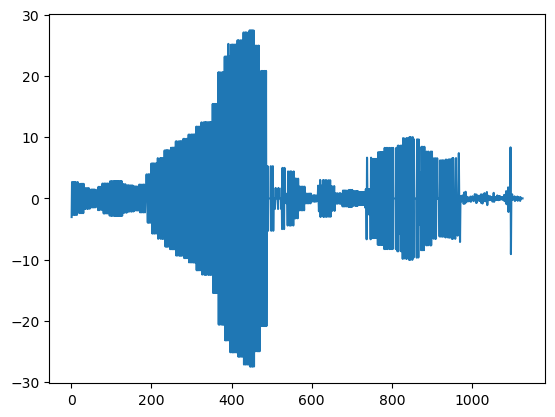

In [15]:
#First Differencing

df_train_diff = df_train['Sulphur Rate'].diff().dropna()
df_train_diff.plot()

In [16]:
adf_test = adfuller(df_train_diff)
print(f'p-value: {adf_test[1]}') # This gives us a p-value:2.1229061985843574e-16  which is less than 0.05, hence we can accept that it is stationary.

p-value: 3.8242985327406085e-18


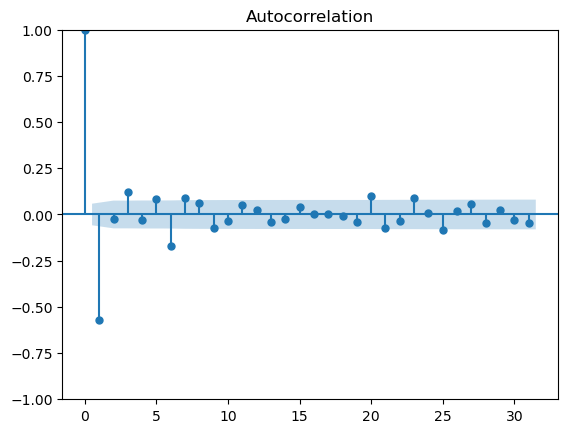

In [17]:
#Finding the parameters p and q

from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf
series = df_train_diff #insert data here
plot_acf(series) #ACF plot function
pyplot.show() #Show graph

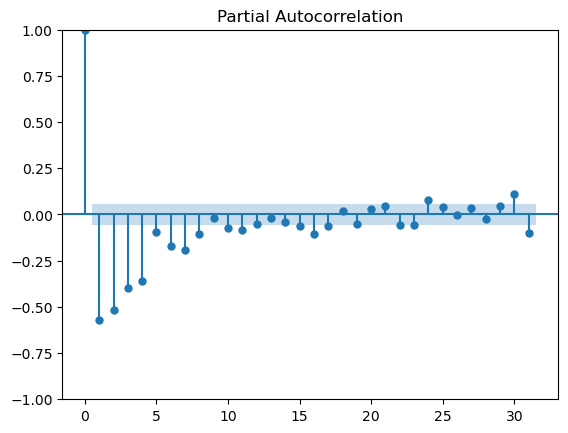

In [18]:
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_pacf
series = df_train_diff #insert data here
plot_pacf(series) #ACF plot function
pyplot.show() #Show graph

# Auto ARIMA

In [20]:
!pip install pmdarima

  Using cached Cython-3.0.10-cp311-cp311-win_amd64.whl.metadata (3.2 kB)
   ---------------------------------------- 0.0/614.7 kB ? eta -:--:--
   ---------------------------------------- 0.0/614.7 kB ? eta -:--:--
    --------------------------------------- 10.2/614.7 kB ? eta -:--:--
    --------------------------------------- 10.2/614.7 kB ? eta -:--:--
   - ------------------------------------- 30.7/614.7 kB 217.9 kB/s eta 0:00:03
   --- ----------------------------------- 61.4/614.7 kB 409.6 kB/s eta 0:00:02
   ---- ---------------------------------- 71.7/614.7 kB 357.2 kB/s eta 0:00:02
   ----- --------------------------------- 92.2/614.7 kB 374.1 kB/s eta 0:00:02
   ------ ------------------------------- 112.6/614.7 kB 385.0 kB/s eta 0:00:02
   -------- ----------------------------- 143.4/614.7 kB 472.1 kB/s eta 0:00:01
   ---------- --------------------------- 174.1/614.7 kB 476.3 kB/s eta 0:00:01
   ----------- -------------------------- 184.3/614.7 kB 464.2 kB/s eta 0:00:01
 

In [21]:
from pmdarima import auto_arima


model = auto_arima(df_train['Sulphur Rate'], seasonal=True, m=7, max_p=5, max_d=2, max_q=5, max_P=2, max_D=1, max_Q=2, information_criterion='aic')
print(model.summary())



                                       SARIMAX Results                                        
Dep. Variable:                                      y   No. Observations:                 1127
Model:             SARIMAX(4, 1, 3)x(0, 0, [1, 2], 7)   Log Likelihood               -3263.202
Date:                                Wed, 10 Jul 2024   AIC                           6546.403
Time:                                        11:00:27   BIC                           6596.668
Sample:                                             0   HQIC                          6565.397
                                               - 1127                                         
Covariance Type:                                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.3742      0.020    -69.275      0.000      -1.413      -1.335
ar.

In [22]:
from sklearn.metrics import mean_squared_error, r2_score

n_forecast = len(df_test)  # Number of periods to forecast into the future
forecast = model.predict(n_periods=n_forecast)

# Step 9: Make Predictions
y_pred_test = forecast  # No need to call .values

test_score = r2_score(df_test['Sulphur Rate'], y_pred_test) 
print("Test Score (R-squared)(ARIMA Model):", test_score)


# Step 10: Evaluate the Model
mse = mean_squared_error(df_test['Sulphur Rate'], y_pred_test)
rmse = np.sqrt(mse)
print("Root Mean Squared Error(ARIMA Model):", rmse)

# Print the forecasts
print("Forecasted values:")
print(y_pred_test)

Test Score (R-squared)(ARIMA Model): -1.2609150018915631
Root Mean Squared Error(ARIMA Model): 0.3107544911824749
Forecasted values:
1127    11.355460
1128    11.954843
1129    11.514029
1130    11.330894
1131    11.956100
1132    11.536444
1133    11.353242
1134    11.871044
1135    11.587052
1136    11.410742
1137    11.788121
1138    11.595287
1139    11.460617
1140    11.737035
1141    11.612404
1142    11.479266
1143    11.707750
1144    11.614539
1145    11.507606
1146    11.681260
1147    11.612277
1148    11.532365
1149    11.661420
1150    11.609291
1151    11.551327
1152    11.646885
1153    11.606910
1154    11.565324
1155    11.636121
1156    11.605297
dtype: float64


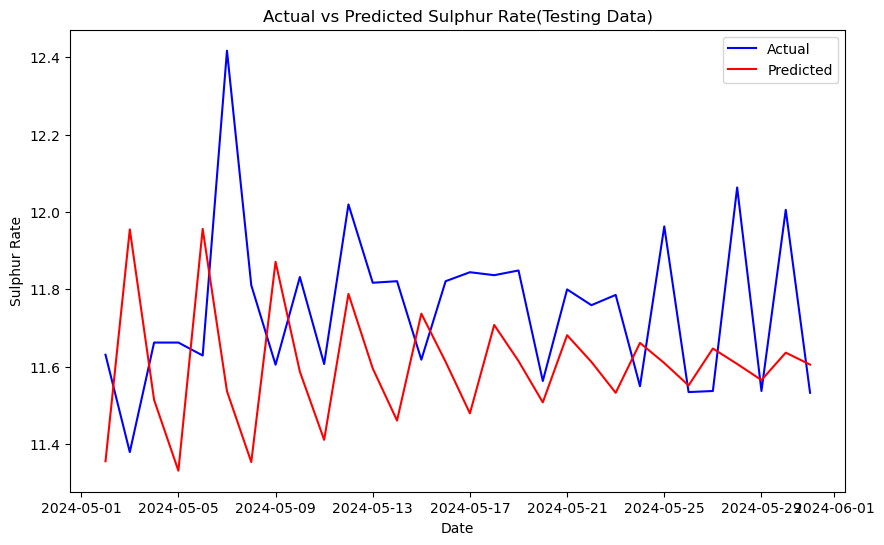

In [23]:
plt.figure(figsize=(10, 6))
plt.plot(df_test['Date'], df_test['Sulphur Rate'], label='Actual', color='blue')
plt.plot(df_test['Date'], y_pred_test, label='Predicted', color='red')
plt.title('Actual vs Predicted Sulphur Rate(Testing Data)')
plt.xlabel('Date')
plt.ylabel('Sulphur Rate')
plt.legend()

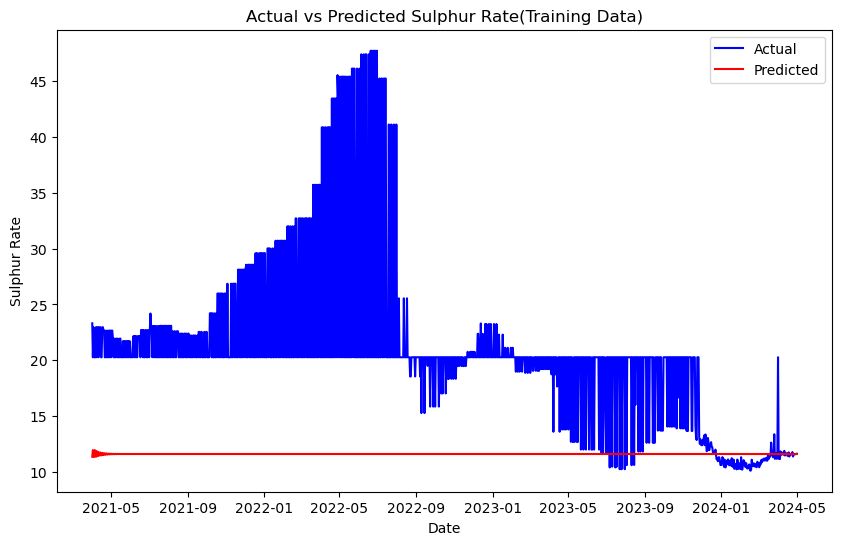

In [24]:
forecast = model.predict(n_periods=len(df_train))
y_pred_train = forecast


plt.figure(figsize=(10, 6))
plt.plot(df_train['Date'], df_train['Sulphur Rate'], label='Actual', color='blue')
plt.plot(df_train['Date'], y_pred_train, label='Predicted', color='red')
plt.title('Actual vs Predicted Sulphur Rate(Training Data)')
plt.xlabel('Date')
plt.ylabel('Sulphur Rate')
plt.legend()

In [25]:
#Generate forecasts for the next 20 days
forecast_next_20_days = model.predict(n_periods=20)

# Print the forecasted values
print("Forecast for the next 20 days:")
print(forecast_next_20_days)

Forecast for the next 20 days:
1127    11.355460
1128    11.954843
1129    11.514029
1130    11.330894
1131    11.956100
1132    11.536444
1133    11.353242
1134    11.871044
1135    11.587052
1136    11.410742
1137    11.788121
1138    11.595287
1139    11.460617
1140    11.737035
1141    11.612404
1142    11.479266
1143    11.707750
1144    11.614539
1145    11.507606
1146    11.681260
dtype: float64


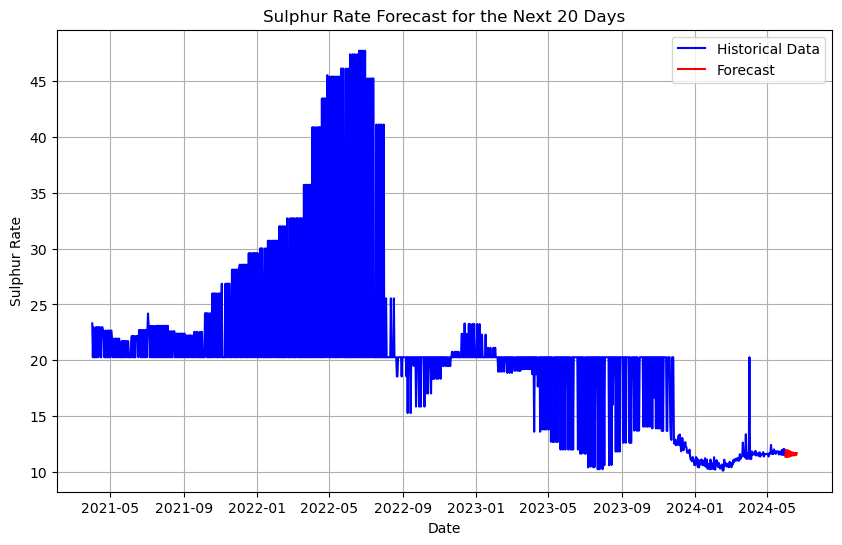

In [26]:
# Plot the forecasted values along with the existing data
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Sulphur Rate'], label='Historical Data', color='blue')
plt.plot(pd.date_range(df['Date'].iloc[-1], periods=20), forecast_next_20_days, label='Forecast', color='red')
plt.title('Sulphur Rate Forecast for the Next 20 Days')
plt.xlabel('Date')
plt.ylabel('Sulphur Rate')
plt.legend()
plt.grid(True)
plt.show()

# Manual ARIMA


In [27]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(df_train['Sulphur Rate'], order=(2,1,1))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:           Sulphur Rate   No. Observations:                 1127
Model:                 ARIMA(2, 1, 1)   Log Likelihood               -3290.864
Date:                Wed, 10 Jul 2024   AIC                           6589.728
Time:                        11:03:06   BIC                           6609.833
Sample:                             0   HQIC                          6597.325
                               - 1127                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4586      0.017    -26.364      0.000      -0.493      -0.424
ar.L2         -0.3107      0.016    -19.639      0.000      -0.342      -0.280
ma.L1         -0.8690      0.010    -89.538      0.0

In [28]:
from sklearn.metrics import mean_squared_error, r2_score

# Step 8: Validate the Model
# Forecast
forecast = model_fit.forecast(steps=len(df_test))

# Step 9: Make Predictions
predictions = forecast.values

# Step 10: Evaluate the Model
mse = mean_squared_error(df_test['Sulphur Rate'], predictions)
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)



Root Mean Squared Error: 0.2520028220076483


In [29]:
forecast = model_fit.forecast(steps=len(df_train))
predictions = forecast.values

y_true = df_train['Sulphur Rate'].values
y_pred = forecast.values

# Calculate R-squared score
test_score = r2_score(y_true, y_pred) 
print("Test Score (R-squared):", test_score)

print("Predicted values:",y_pred)
print("True values:",y_true)

Test Score (R-squared): -1.6237190324644541
Predicted values: [11.59010673 11.60422785 11.61038873 ... 11.60523024 11.60523024
 11.60523024]
True values: [23.31       20.27063822 22.96       ... 11.60077778 11.6162
 11.63077778]


In [31]:
from sklearn.metrics import r2_score

forecast = model_fit.forecast(steps=len(df_test))
predictions = forecast.values

# Assuming 'Sulphur Rate' is the target variable
y_true = df_test['Sulphur Rate'].values
y_pred = forecast.values

# Calculate R-squared score
test_score = r2_score(y_true, y_pred) 
print("Test Score (R-squared):", test_score)

print("Predicted values:",y_pred)
print("True values:",y_true)


Test Score (R-squared): -0.48682623596581975
Predicted values: [11.59010673 11.60422785 11.61038873 11.60317617 11.60456945 11.60617146
 11.60500394 11.60504159 11.60538707 11.60521695 11.60518762 11.60525392
 11.60523263 11.60522179 11.60523338 11.60523143 11.60522872 11.60523057
 11.60523057 11.60522999 11.60523026 11.60523031 11.60523021 11.60523024
 11.60523026 11.60523024 11.60523024 11.60523025 11.60523024 11.60523024]
True values: [11.63077778 11.379      11.66225    11.66225    11.62881818 12.4168
 11.8105     11.605      11.83166667 11.60666667 12.0194     11.8169
 11.8209     11.618      11.8209     11.84411111 11.83644444 11.848625
 11.562875   11.79966667 11.7589     11.78544444 11.54933333 11.9626
 11.53422222 11.537      12.06325    11.537      12.00544444 11.532375  ]


In [33]:
forecast_next_20_days = model_fit.forecast(steps=20)

# Print the forecasted values
print("Forecast for the next 20 days:")
print(forecast_next_20_days)



Forecast for the next 20 days:
1127    11.590107
1128    11.604228
1129    11.610389
1130    11.603176
1131    11.604569
1132    11.606171
1133    11.605004
1134    11.605042
1135    11.605387
1136    11.605217
1137    11.605188
1138    11.605254
1139    11.605233
1140    11.605222
1141    11.605233
1142    11.605231
1143    11.605229
1144    11.605231
1145    11.605231
1146    11.605230
Name: predicted_mean, dtype: float64


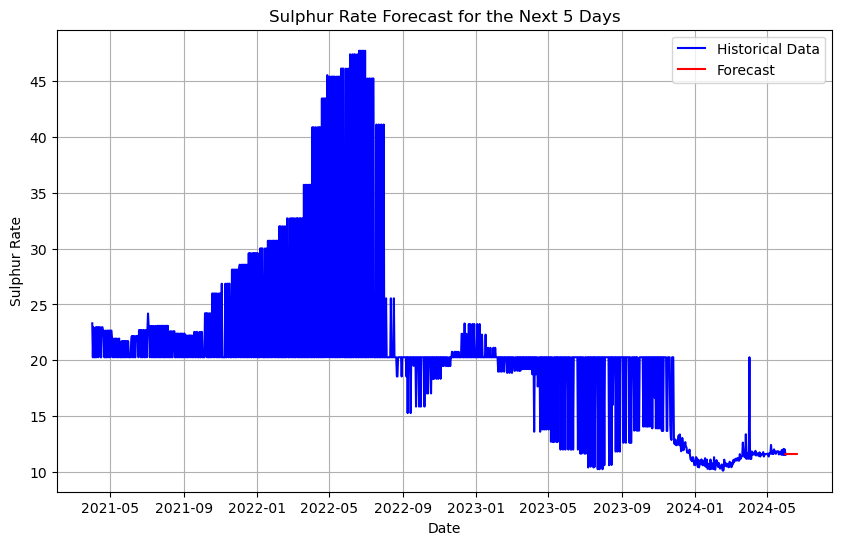

In [34]:
# Plot the forecasted values along with the existing data
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Sulphur Rate'], label='Historical Data', color='blue')
plt.plot(pd.date_range(df['Date'].iloc[-1], periods=20), forecast_next_20_days, label='Forecast', color='red')
plt.title('Sulphur Rate Forecast for the Next 5 Days')
plt.xlabel('Date')
plt.ylabel('Sulphur Rate')
plt.legend()
plt.grid(True)
plt.show()

# VAR (Vector Autoregression Model)

In [35]:
df1 = pd.read_excel(r'C:/Users/Ravi Pandey/Documents/Internship/drive-download-20240709T093617Z-001/Agrocel_Jupyter.xlsx')

In [36]:
df1

,Date,Sulphur Rate,Sulphuric acid Rate
0,2021-04-01,23.310000,NaN
1,2021-04-02,NaN,10.07
2,2021-04-03,22.960000,10.07
3,2021-04-04,NaN,10.07
4,2021-04-05,NaN,10.07
...,...,...,...
1152,2024-05-27,11.537000,NaN
1153,2024-05-28,12.063250,NaN
1154,2024-05-29,11.537000,NaN
1155,2024-05-30,12.005444,NaN


In [37]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1157 entries, 0 to 1156
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0    Date                1157 non-null   datetime64[ns]
 1   Sulphur Rate         553 non-null    float64       
 2   Sulphuric acid Rate  400 non-null    float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 27.2 KB


In [38]:
from sklearn.impute import KNNImputer

# Initialize the KNN imputer
k = 5  # Number of neighbors to consider
imputer = KNNImputer(n_neighbors=k)

df_subset = df1[['Sulphur Rate']]
df_imputed_sulphur = imputer.fit_transform(df_subset)
df1['Sulphur Rate'] = df_imputed_sulphur


In [39]:
df1

,Date,Sulphur Rate,Sulphuric acid Rate
0,2021-04-01,23.310000,NaN
1,2021-04-02,20.270638,10.07
2,2021-04-03,22.960000,10.07
3,2021-04-04,20.270638,10.07
4,2021-04-05,20.270638,10.07
...,...,...,...
1152,2024-05-27,11.537000,NaN
1153,2024-05-28,12.063250,NaN
1154,2024-05-29,11.537000,NaN
1155,2024-05-30,12.005444,NaN


In [40]:
# Initialize the KNN imputer
k = 30  # Number of neighbors to consider
imputer = KNNImputer(n_neighbors=k)

df_subset = df1[['Sulphuric acid Rate']]
df_imputed_sulphuric  = imputer.fit_transform(df_subset)
df1['Sulphuric acid Rate'] = df_imputed_sulphuric


In [41]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1157 entries, 0 to 1156
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0    Date                1157 non-null   datetime64[ns]
 1   Sulphur Rate         1157 non-null   float64       
 2   Sulphuric acid Rate  1157 non-null   float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 27.2 KB


In [42]:
#Stationarity checking 

from statsmodels.tsa.stattools import adfuller

# Select the column 'Sulphur Rate' from the DataFrame
sulphur_rate_data = df1['Sulphur Rate']

# Perform the Augmented Dickey-Fuller test
adf_test = adfuller(sulphur_rate_data)
print(f'p-value: {adf_test[1]}')    #This gives us a output of p-value: 0.6980113868350736
                                    #This result shows a large p-value, which means the test fails to reject the null hypothesis. So the ADF test also suggests that our time series is non-stationary.

p-value: 0.9130467430799447


In [43]:
#Stationarity checking 

from statsmodels.tsa.stattools import adfuller

# Select the column 'Sulphur acid Rate' from the DataFrame
sulphur_rate_data = df1['Sulphuric acid Rate']

# Perform the Augmented Dickey-Fuller test
adf_test = adfuller(sulphur_rate_data)
print(f'p-value: {adf_test[1]}')    #This gives us a output of p-value: 0.6980113868350736
                                    #This result shows a large p-value, which means the test fails to reject the null hypothesis. So the ADF test also suggests that our time series is non-stationary.

p-value: 0.0008128885679302572


<Axes: >

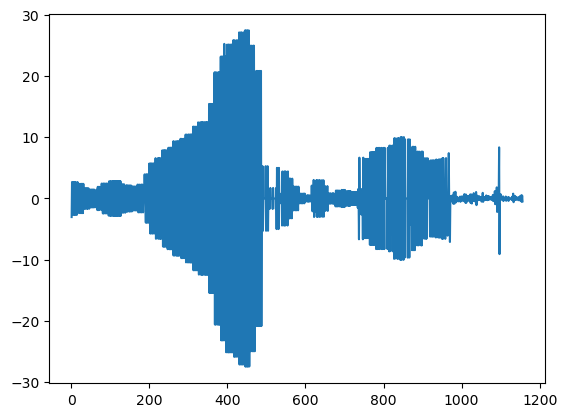

In [44]:
#First Differencing

df_diff = df1['Sulphur Rate'].diff().dropna()
df_diff.plot()



In [45]:
#Stationarity checking 

from statsmodels.tsa.stattools import adfuller

# Select the column 'Sulphur Rate' from the DataFrame
sulphur_rate_data = df_diff

# Perform the Augmented Dickey-Fuller test
adf_test = adfuller(sulphur_rate_data)
print(f'p-value: {adf_test[1]}')    #This gives us a output of p-value: 0.6980113868350736
                                    #This result shows a large p-value, which means the test fails to reject the null hypothesis. So the ADF test also suggests that our time series is non-stationary.

p-value: 2.1845747988195188e-15


In [46]:
from sklearn.model_selection import train_test_split
from statsmodels.tsa.api import VAR

# Step 1: Check Stationarity
acid_rate_stationary = adfuller(df1['Sulphuric acid Rate'])[1] < 0.05

# Step 2: Make "Sulphur Rate" Data Stationary
if not acid_rate_stationary:
    df['Sulphur Rate Diff'] = df1['Sulphur Rate'].diff().dropna()

# Step 3: Split the Data into Training and Testing Sets
train_df, test_df = train_test_split(df1, test_size=0.2, shuffle=False)  # Adjust test_size as needed

# Step 4: Fit VAR Model on the Training Set
if acid_rate_stationary:
    model = VAR(train_df[['Sulphur Rate', 'Sulphuric acid Rate']])
else:
    model = VAR(train_df[['Sulphur Rate Diff', 'Sulphuric acid Rate']])

results = model.fit()

In [47]:
results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Wed, 10, Jul, 2024
Time:                     11:06:42
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                    4.95831
Nobs:                     924.000    HQIC:                   4.93891
Log likelihood:          -4892.45    FPE:                    137.958
AIC:                      4.92695    Det(Omega_mle):         137.067
--------------------------------------------------------------------
Results for equation Sulphur Rate
                            coefficient       std. error           t-stat            prob
-----------------------------------------------------------------------------------------
const                         18.705419         1.329278           14.072           0.000
L1.Sulphur Rate                0.131360         0.032668            4.021           0.000
L1.Sulphuric acid